In [222]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr

df = pd.read_csv('./S1Dataset.csv')

PERFORMANCE = df['PERFORMANCE'].dropna()
VO2MAX = df['VO2max'].dropna()
RE = df['RE'].dropna()
PVO2MAX_VT = df['VT -%VO2max'].dropna()
PVO2MAX_RCT = df['RCT -% VO2max'].dropna()
VVO2MAX = df['PEAK SPEED'].dropna()

In [142]:

# # Pearson correlations
m_VO2MAX = np.mean(VO2MAX)
sd_VO2MAX = np.std(VO2MAX)
v_VO2MAX = np.var(VO2MAX)
r_VO2MAX = list(pearsonr(VO2MAX, PERFORMANCE))[0]

m_RE = np.mean(RE)
sd_RE = np.std(RE)
v_RE = np.var(RE)
r_RE = list(pearsonr(RE, PERFORMANCE))[0]

m_PVO2MAX_VT = np.mean(PVO2MAX_VT)
sd_PVO2MAX_VT = np.std(PVO2MAX_VT)
v_PVO2MAX_VT = np.var(PVO2MAX_VT)
r_PVO2MAX_VT = list(pearsonr(PVO2MAX_VT, PERFORMANCE))[0]

m_PVO2MAX_RCT = np.mean(PVO2MAX_RCT)
sd_PVO2MAX_RCT = np.std(PVO2MAX_RCT)
v_PVO2MAX_RCT = np.var(PVO2MAX_RCT)
r_PVO2MAX_RCT = list(pearsonr(PVO2MAX_RCT, PERFORMANCE))[0]

m_VVO2MAX = np.mean(VVO2MAX)
sd_VVO2MAX = np.std(VVO2MAX)
v_VVO2MAX = np.var(VVO2MAX)
r_VVO2MAX = list(pearsonr(VVO2MAX, PERFORMANCE))[0]

print(m_VO2MAX, m_RE, m_PVO2MAX_VT, m_PVO2MAX_RCT, m_VVO2MAX) 
print(sd_VO2MAX, sd_RE, sd_PVO2MAX_VT, sd_PVO2MAX_RCT, sd_VVO2MAX) 
print(v_VO2MAX, v_RE, v_PVO2MAX_VT, v_PVO2MAX_RCT, v_VVO2MAX) 
print(r_VO2MAX, r_RE, r_PVO2MAX_VT, r_PVO2MAX_RCT, r_VVO2MAX)

61.53187499999999 206.12520833333335 60.62229166666666 87.60812499999999 19.724999999999998
7.434616571667185 17.354580566042614 6.632085908540683 5.140247909168227 1.8930244759819317
55.27352356770833 301.18146662326393 43.98456349826389 26.42214856770833 3.583541666666667
-0.7498884082956474 0.4060078233094059 0.11154884517704797 -0.32688397600871366 -0.9261528521647127
[-0.9261528521647127, 4.1647894058888496e-21]


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import DataFrame, Series

x_df = df[['VO2max', 'RE', 'VT -%VO2max', 'VT -%VO2max', 'PEAK SPEED']].dropna()
y_df = df[['PERFORMANCE']].dropna()
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)
lreg = LinearRegression()

lreg.fit(x_train, y_train)
pred = lreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
print(mse)

score = lreg.score(x_test, y_test)
print(score)

coeff = DataFrame(x_df.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_[0])

print(coeff)



PERFORMANCE    58071.188353
dtype: float64
0.852049969536054
             0  Coefficient Estimate
0       VO2max            -25.572370
1           RE              6.385668
2  VT -%VO2max             -0.059068
3  VT -%VO2max             -0.059068
4   PEAK SPEED           -218.517845


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from pandas import DataFrame, Series

x_df = df[['VO2max', 'RE', 'VT -%VO2max', 'VT -%VO2max', 'PEAK SPEED']].dropna()
y_df = df[['PERFORMANCE']].dropna()
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)
lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train, y_train)
pred = lassoReg.predict(x_test).reshape(12,1)
mse = np.mean((pred - y_test)**2)
print(mse)

score = lassoReg.score(x_test, y_test)
print(score)

coeff = DataFrame(x_df.columns)
coeff['Coefficient Estimate'] = Series(lassoReg.coef_)

print(coeff)

PERFORMANCE    40478.717896
dtype: float64
0.9078356215622652
             0  Coefficient Estimate
0       VO2max            -17.317856
1           RE              6.281207
2  VT -%VO2max              1.674483
3  VT -%VO2max              0.000000
4   PEAK SPEED           -260.556727


In [220]:
pvalue = list(pearsonr(VVO2MAX, PERFORMANCE))[1]
print(pvalue)

4.1647894058888496e-21


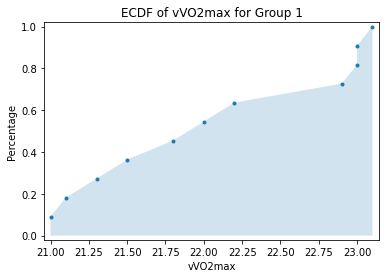

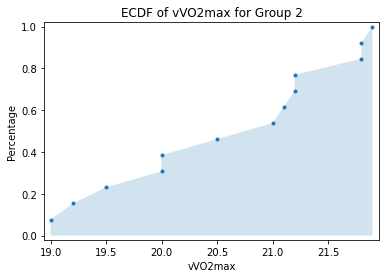

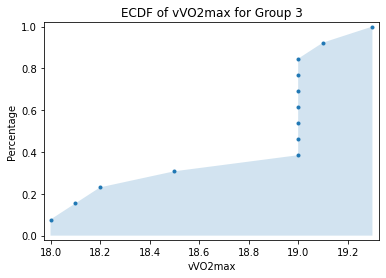

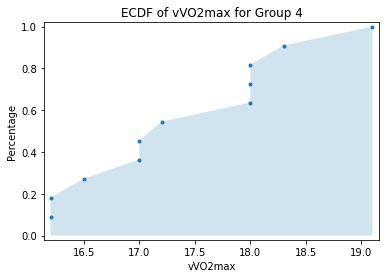

<AxesSubplot:xlabel='PEAK SPEED', ylabel='Density'>

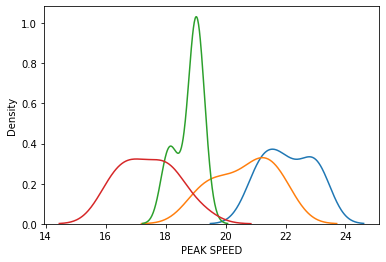

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
group1_df = df[df['PERFORMANCE']<4200]
group2_df = df[(df['PERFORMANCE']>=4200) & (df['PERFORMANCE']<4800)]
group3_df = df[(df['PERFORMANCE']>=4800) & (df['PERFORMANCE']<5400)]
group4_df = df[(df['PERFORMANCE']>=5400) & (df['PERFORMANCE']<6300)]

def ecdf(data, title = "ECDF Plot", xlabel="Variable", ylabel="Percentage"):
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.step(xaxis,yaxis,linestyle='none', marker='.')
    plt.title(title)
    plt.fill_between(xaxis,yaxis,alpha=.2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)
    plt.show()


ecdf(group1_df['PEAK SPEED'], "ECDF of vVO2max for Group 1", "vVO2max")
ecdf(group2_df['PEAK SPEED'], "ECDF of vVO2max for Group 2", "vVO2max")
ecdf(group3_df['PEAK SPEED'], "ECDF of vVO2max for Group 3", "vVO2max")
ecdf(group4_df['PEAK SPEED'], "ECDF of vVO2max for Group 4", "vVO2max")



sns.kdeplot(data=group1_df, x="PEAK SPEED", label='group 1')
sns.kdeplot(data=group2_df, x="PEAK SPEED", label='group 2')
sns.kdeplot(data=group3_df, x="PEAK SPEED", label='group 3')
sns.kdeplot(data=group4_df, x="PEAK SPEED", label='group 4')


